# 데이터 생성 및 시각화

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 선형 데이터 생성 함수


 Type of Train_X is <class 'numpy.ndarray'>
 Shape of Train_X is (1, 20)
 Type of Train_y is <class 'numpy.ndarray'>
 Shape of Train_y is (1, 20)


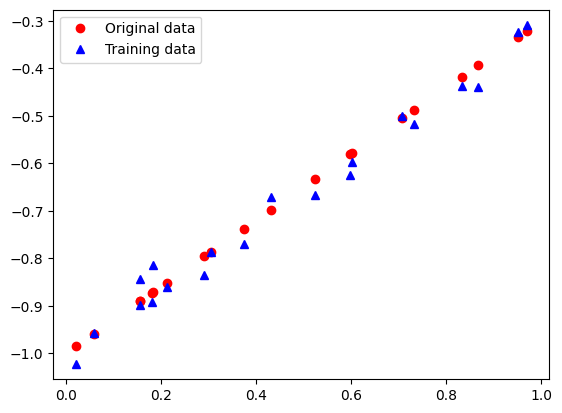

In [19]:
# 선형 데이터 생성 함수
np.random.seed(42)
def f(x, a, b):
  n = train_X.size
  vals = np.zeros((1,n)) # 결과 담을 1 x n 크기 배열 0으로 초기화
  for i in range(0, n):
    ax = np.multiply(a, x.item(i)) # x의 1개의 스칼라 값 꺼낸뒤 a와 곱하기.
    val = np.add(ax, b) # ax + b 계산
    vals[0, i] = val # 배열에 결과 저장
  return vals


# 정답 계수
Wref = 0.7
bref = -1.0
n = 20
noise_var = 0.001
train_X = np.random.random((1,n))
ref_Y = f(train_X, Wref, bref)
train_Y = ref_Y + np.sqrt(noise_var)*np.random.randn(1,n)
n_samples = train_X.size

print('')
print(f" Type of Train_X is {type(train_X)}")
print(f" Shape of Train_X is {train_X.shape}")
print(f" Type of Train_y is {type(train_Y)}")
print(f" Shape of Train_y is {train_Y.shape}")

# plot
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label = 'Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'b^', label = 'Training data')
plt.axis('equal')
plt.legend()

# Pytorch tensor 변환 및 모델/옵티마이저 설정

In [20]:
# Pytorch tensor 변환 및 모델/옵티마이저 설정

# Numpy to Pytorch Tensor
x_train = torch.tensor(train_X, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(train_Y, dtype=torch.float32).view(-1, 1)

# model 정의 (입력 1 -> 출력 1 회귀)
model = torch.nn.Linear(in_features = 1, out_features = 1)

# 손실 함수 (MSE) & 옵티마이저 (SGD)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 학습 설정
training_epochs = 2000
display_step = 50

# 학습 루프 실행

In [21]:
# 학습 루프 실행

for epoch in range(training_epochs):
  model.train()

  # 예측 및 손실 계산
  outputs = model(x_train)
  loss = criterion(outputs, y_train)

  # 경사 초기화, 역전파, 가중치 업데이트
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # 출력
  if epoch % display_step == 0:
    w, b = model.parameters()
    print(f'Epoch {epoch +1:04d}, Loss: {loss.item():.6f}')
    print(f' W = {w.item():.4f}, b = {b.item():.4f}')
    print(f' Wref = {Wref:.4f}, bref = {bref:.4f}')

Epoch 0001, Loss: 0.903017
 W = -0.2668, b = 0.3194
 Wref = 0.7000, bref = -1.0000
Epoch 0051, Loss: 0.194615
 W = -0.4159, b = -0.2121
 Wref = 0.7000, bref = -1.0000
Epoch 0101, Loss: 0.119273
 W = -0.4006, b = -0.3945
 Wref = 0.7000, bref = -1.0000
Epoch 0151, Loss: 0.099011
 W = -0.3419, b = -0.4740
 Wref = 0.7000, bref = -1.0000
Epoch 0201, Loss: 0.085256
 W = -0.2745, b = -0.5219
 Wref = 0.7000, bref = -1.0000
Epoch 0251, Loss: 0.073692
 W = -0.2082, b = -0.5589
 Wref = 0.7000, bref = -1.0000
Epoch 0301, Loss: 0.063733
 W = -0.1455, b = -0.5911
 Wref = 0.7000, bref = -1.0000
Epoch 0351, Loss: 0.055136
 W = -0.0870, b = -0.6204
 Wref = 0.7000, bref = -1.0000
Epoch 0401, Loss: 0.047713
 W = -0.0325, b = -0.6474
 Wref = 0.7000, bref = -1.0000
Epoch 0451, Loss: 0.041304
 W = 0.0182, b = -0.6724
 Wref = 0.7000, bref = -1.0000
Epoch 0501, Loss: 0.035770
 W = 0.0653, b = -0.6957
 Wref = 0.7000, bref = -1.0000
Epoch 0551, Loss: 0.030992
 W = 0.1091, b = -0.7173
 Wref = 0.7000, bref = -1.0

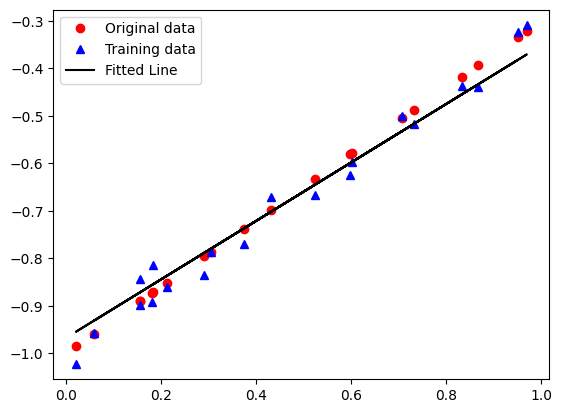

In [30]:
# plot
model.eval()
with torch.no_grad():
  predicted = model(x_train).numpy()

plt.figure(2)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label = 'Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'b^', label = 'Training data')
plt.plot(train_X[0, :], predicted.flatten(), 'k-', label='Fitted Line')
plt.axis('equal')
plt.legend()